<a href="https://colab.research.google.com/github/arnaldog12/Machine_Learning/blob/master/Avalia%C3%A7%C3%A3o%20de%20Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚙️ 0. Dependências

In [ ]:
import numpy as np
from sklearn.metrics import (
    # classification
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
    roc_auc_score,
    matthews_corrcoef,
    RocCurveDisplay,
    classification_report,
    confusion_matrix,
    # regression
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

from sklearn.datasets import load_iris, make_classification, make_regression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier

# 📊 Classificação

Há uma variedade de medidas de desempenho para avaliar algoritmos em problemas de classificação binária. Em comum, a maioria dessas métricas leva em consideração alguns dos quatro resultados possíveis presentes na matriz de confusão binária:
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)


In [ ]:
x_binary, y_binary = make_classification(n_classes=2, n_samples=150, n_features=10, random_state=42)
print(x_binary.shape, y_binary.shape)

clf_bin = SVC()
clf_bin.fit(x_binary, y_binary)
y_pred_bin = clf_bin.predict(x_binary)

(150, 10) (150,)


In [ ]:
x_multi, y_multi = load_iris(return_X_y=True)
print(x_multi.shape, y_multi.shape)

clf_multi = SVC()
clf_multi.fit(x_multi, y_multi)
y_pred_multi = clf_multi.predict(x_multi)

(150, 4) (150,)


In [ ]:
x_unb, y_unb = X, y = make_classification(
    n_samples=100,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.95, 0.05],
    flip_y=0.1,
    random_state=42
)
print(x_unb.shape, y_unb.shape)

clf_unb = SVC()
clf_unb.fit(x_unb, y_unb)
y_pred_unb = clf_unb.predict(x_unb)

(100, 20) (100,)


## Acurácia

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

✅ **Vantagens**
- fácil de interpretar

❌ **Desvantagens**
- só é válida para datasets balanceados

❓ **Quando Usar?**
- quando o dataset for balanceado

In [ ]:
accuracy_score(y_binary, y_pred_bin)

0.9333333333333333

In [ ]:
balanced_accuracy_score(y_binary, y_pred_bin)

np.float64(0.9333333333333333)

In [ ]:
balanced_accuracy_score(y_binary, y_pred_bin, sample_weight=np.random.randint(1, 10, len(y_binary)))

np.float64(0.9423526178370207)

In [ ]:
accuracy_score(y_multi, y_pred_multi)

0.9733333333333334

In [ ]:
balanced_accuracy_score(y_multi, y_pred_multi)

np.float64(0.9733333333333333)

In [ ]:
balanced_accuracy_score(y_multi, y_pred_multi, sample_weight=np.random.randint(1, 10, len(y_multi)))

np.float64(0.9717483559947584)

## Precision, Recall e F1

$$
P = \frac{TP}{TP + FP}
$$

$$
R = \frac{TP}{TP + FN}
$$

$$
F1 = 2 \cdot \frac{P \cdot R}{P + R}
$$


- **Recall**: o quão bom o algoritmo é em acertar a classe positiva. Ou seja: “*Das amostras positivas, quantas o algoritmo acertou?*”

- **Precisão**: o quanto você confia na predição da classe positiva. Ou seja: “*Das amostra que meu algoritmo disse que eram positivas, quantas realmente são?*”

- **f1**: representa **uma média harmônica da Precisão e Recall**. Por que harmônica? Ao contrário da média aritmética, pra aumentar a f1-score, ambas Precisão e Recall devem ser maiores também.

✅ **Vantagens**
- fácil de interpretar
- funcionam para datasets desbalanceados

❌ **Desvantagens**
- só funcionam para classe positiva. Quando a classe negativa for mais importante, usar NPV e Specificity (ver Referências).

❓ **Quando Usar?**
- em caso de datasets desbalanceados
- em problemas de detecção ou da área de saúde

In [ ]:
confusion_matrix(y_unb, y_pred_unb)

array([[89,  0],
       [ 6,  5]])

In [ ]:
precision_score(y_unb, y_pred_unb)

1.0

In [ ]:
recall_score(y_unb, y_pred_unb)

0.45454545454545453

In [ ]:
f1_score(y_unb, y_pred_unb)

0.625

## F-Beta

$$
F_{β} = \frac{(1 + β^2) \cdot P \cdot R}{β^2 \cdot P + R}
$$

A F-beta é uma generalização da f1. Ela introduz um termo Beta que pondera o quanto recall é mais importante do que a precisão no cálculo da métrica. Repare que, quando Beta=1, temos a fórmula original da f1-score.

Um outro valor muito comum é $β=2$, conhecida como a **f2-score**. Nesse caso, estamos dizendo pra métrica que **recall tem um peso maior que a precisão**. Ou seja, obter um bom recall é mais importante pro classificador do que a precisão. **Isso é util em problemas onde queremos ter certeza que o nosso classificador é bom em identificar a classe positiva, mesmo que pra isso ele acabe gerando mais falsos positivos**.

In [ ]:
fbeta_score(y_unb, y_pred_unb, beta=1)

0.625

In [ ]:
fbeta_score(y_unb, y_pred_unb, beta=2)

0.5102040816326531

## ROC e AUC

**Curva ROC**: relação entre Taxa de Verdadeiros Positivos (TPR) e a Taxa de Falsos Positivos (FPR) em diferentes thresholds de decisão.

✅ **Vantagens**
- visualizar desempenho em diferente thresholds

❌ **Desvantagens**
- menos intuitiva
- apenas classificação binária
- pode ser enganosa em datasets desbalanceados

❓ **Quando Usar?**
- seleção do threshold ótimo de classificação
- problemas onde tanto FPs e FNs importam

___

**AUC**: área sob a curva ROC. Mede a probabilidade de um modelo rankear um positivo acima de um negativo.

✅ **Vantagens**
- fácil interpretação
- fácil comparação entre modelos
- independe do threshold

❌ **Desvantagens**
- pode ser enganosa em datasets desbalanceados

❓ **Quando Usar?**
- comparação de modelos em diferentes thresholds
- em bancos relativamente balanceados

0.9333333333333332


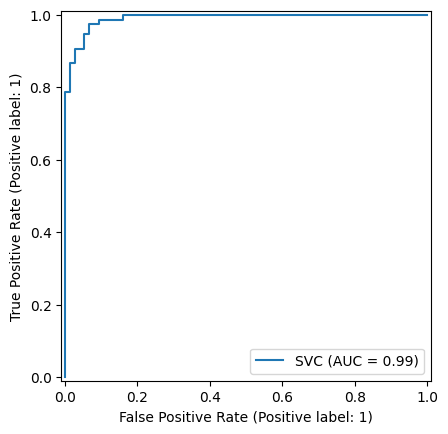

In [ ]:
print(roc_auc_score(y_binary, y_pred_bin))

roc_display = RocCurveDisplay.from_estimator(clf_bin, x_binary, y_binary)
roc_display

0.7272727272727273


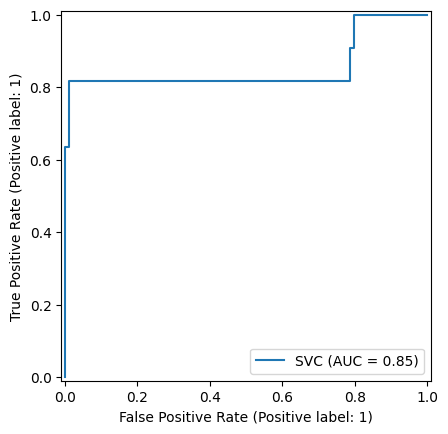

In [ ]:
print(roc_auc_score(y_unb, y_pred_unb))

roc_display = RocCurveDisplay.from_estimator(clf_unb, x_unb, y_unb)
roc_display

0.7272727272727273


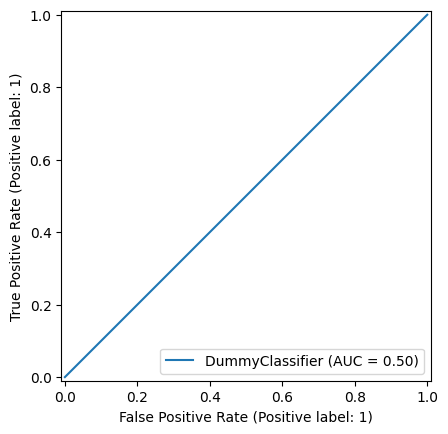

In [ ]:
print(roc_auc_score(y_unb, y_pred_unb))

clf_dummy = DummyClassifier()
clf_dummy.fit(x_unb, y_unb)

roc_display = RocCurveDisplay.from_estimator(clf_dummy, x_unb, y_unb)
roc_display

In [ ]:
print(classification_report(y_unb, y_pred_unb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        89
           1       1.00      0.45      0.62        11

    accuracy                           0.94       100
   macro avg       0.97      0.73      0.80       100
weighted avg       0.94      0.94      0.93       100



## MCC

✅ **Vantagens**
- leva em consideração todas as possibilidades (tp, fn, fp e fn)
- robusta a bancos desbalanceados
- coeficiente normalizado entre -1 e 1
- fácil interpretação

❌ **Desvantagens**
- não tem

❓ **Quando Usar?**
- em datasets desbalanceados

___

**Interpretação**:
- -1: quanto mais próximo de -1 sua MCC, pior está o seu classificador. Ou seja, ele está errando mais do que acerta.

- +1: por outro lado, quanto mais próximo de +1, melhor está o seu classificador. Ou seja, ele está acertando mais do que erra.

- 0: quando o coeficiente é próximo de 0, isso mostra que o classificador está apenas “chutando” a(s) classe(s) mais frequente(s).

In [ ]:
matthews_corrcoef(y_unb, y_pred_unb)

np.float64(0.6525621200883198)

# 📈 Regressão

In [ ]:
x_reg, y_reg = make_regression(n_samples=150, n_features=10, n_informative=8, n_targets=1, noise=0.2, random_state=42)
print(x_reg.shape, y_reg.shape)

reg = LinearRegression()
reg.fit(x_reg, y_reg)
y_pred_reg = reg.predict(x_reg)

(150, 10) (150,)


## MSE e RMSE

$$
MSE = \frac{1}{n} \sum_1^n (y_i - \hat{y}_i)^2
$$

✅ **Vantagens**
- penaliza mais fortemente erros grandes
- útil para otimização matemática

❌ **Desvantagens**
- a escala não é intuitiva (difícil de interpretar)
- sensível a outliers
- só pode ser usada para comparar models no mesmo dataset (por causa da escala)

❓ **Quando Usar?**
- erros grandes são críticos
- otimização de algoritmos (função de custo)

___

$$
RMSE = \sqrt{ \frac{1}{n} \sum_1^n (y_i - \hat{y}_i)^2 }
$$

✅ **Vantagens**
- escala intuitiva
- preferível sobre MSE e MAE

❌ **Desvantagens**
- escala dependente dos valores do dataset
- sensível a outliers (mas menos que MSE)
- só pode ser usada para comparar models no mesmo dataset (por causa da escala)

❓ **Quando Usar?**
- quando interpretação é importante
- comparar modelos no mesmo dataset

In [ ]:
mean_squared_error(y_reg, y_pred_reg)

0.0402522325049426

In [ ]:
root_mean_squared_error(y_reg, y_pred_reg)

0.20062959030248403

## MAE

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}\|y_i - \hat{y}_i\|
$$

✅ **Vantagens**
- escala intuitiva
- menos sensível a outliers que MSE/RMSE

❌ **Desvantagens**
- não é diferenciável na origem

❓ **Quando Usar?**
- quando outliers forem um problema
- quando todos os erros (grandes ou pequenos) devem ser tratados de forma igual

In [ ]:
mean_absolute_error(y_reg, y_pred_reg)

0.15945298599163216

## MAPE

$$
MAPE = \frac{100}{n}\sum_{i=1}^{n}\|\frac{y_i - \hat{y}_i}{y_i}\|
$$

✅ **Vantagens**
- fácil comunicação (em porcentagem)
- permite comparação entre datasets diferentes

❌ **Desvantagens**
- indefinida quando $y = 0$
- penaliza mais subestimativas do que superestimativas, pois erros muito pequenos podem distorcer a métrica

❓ **Quando Usar?**
- na explicação para stakeholders
- para comparar desempenho em datasets com escalas diferentes

In [ ]:
mean_absolute_percentage_error(y_reg, y_pred_reg)

0.01012607922894424

## $R^2$

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

✅ **Vantagens**
- R² = 0, quando o modelo prediz a média
- R² < 0 quando o modelo erra todas as predições
- escala intuitiva:
    - quantos % o seu modelo é melhor que a média?
    - quantos % da variação dos dados o seu modelo explica?
- facilita comparação entre modelos

❌ **Desvantagens**
- sempre aumenta com a adição de novas variáveis, mesmo que irrelevantes
- não informa magnitude real do erro

❓ **Quando Usar?**
- comparação entre modelos

In [ ]:
r2_score(y_reg, y_pred_reg)

0.9999980927918491

## $R^2$ ajustado

$$
R^2_{adj} = 1 - (1 - R^2)\cdot\frac{n - 1}{n - p - 1}
$$

Onde:

* $R^2$ = coeficiente de determinação padrão
* $n$ = número de amostras
* $p$ = número de preditores (features)

✅ **Vantagens**
- corrige o $R^2$ penalizando o excesso de variáveis irrelevantes
- melhor para comparação de models com diferentes números de preditores

❌ **Desvantagens**
- menos intuitiva que $R^2$
- também não informa magnitude real do erro

❓ **Quando Usar?**
- **obrigatório** na comparação de modelos com diferente quantidde de features

In [ ]:
r2 = r2_score(y_reg, y_pred_reg)

n = x_reg.shape[0]
p = x_reg.shape[1]

r2_adj = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
r2_adj

0.9999979555826297

# 📖 Referências

> ❗ Leitura Obrigatória

- https://medium.com/@arnaldog12/o-que-não-te-contam-sobre-métricas-de-classificação-binária-d1834e385402